## How to use the output of Deeplabcut

In the `videos` folder of your deeplabcut project, you will find `.h5` and `labeled.mp4` files.

The `h5` file contains the predicted position of the different body parts.

The `labeled.mp4` file is a labeled video. This video can give you a pretty good idea of how your model perform and whether it requires training with additional labeled images.

In real project, I most often have to add new labeled images a few times before getting an acceptable level of performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fn = "labeled_videos/mn4673-01102019-1951_trial_57DLC_resnet50_OpenFieldDez1shuffle1_75000.h5"
df = pd.read_hdf(fn)

The data is stored in a MultiIndex Pandas DataFrame

In [3]:
type(df),df.shape

(pandas.core.frame.DataFrame, (375, 12))

In [4]:
df

scorer    DLC_resnet50_OpenFieldDez1shuffle1_75000                        \
bodyparts                                     nose                         
coords                                           x          y likelihood   
0                                       235.825287  35.532070   0.999964   
1                                       237.078568  37.854618   0.999982   
2                                       236.888824  39.307781   0.999961   
3                                       238.581558  43.325279   0.999982   
4                                       239.792374  46.724586   0.999972   
..                                             ...        ...        ...   
370                                     256.111755  32.979889   0.027612   
371                                     255.722122  32.218151   0.009672   
372                                     255.945755  32.041534   0.005339   
373                                     256.105225  32.195290   0.009243   
374                                     256.020630  32.311081   0.014073   

scorer                                                                         \
bodyparts        earL                              earR                         
coords              x          y likelihood           x          y likelihood   
0          242.442093  20.750565   0.999996  237.230209  20.658558   0.999975   
1          243.826935  23.228884   0.999988  236.853546  23.954571   0.999982   
2          245.280655  26.405109   0.999994  236.712112  26.077391   0.999979   
3          245.095581  29.353909   0.999991  235.882507  29.944572   0.999959   
4          246.037643  33.681210   0.999998  236.980850  34.684532   0.999994   
..                ...        ...        ...         ...        ...        ...   
370        262.217926  29.466351   0.092660  255.276855  30.654987   0.049131   
371        261.452148  29.339317   0.020432  254.263672  30.813887   0.009398   
372        261.747314  29.135441   0.007927  254.582825  30.749445   0.003135   
373        261.718597  29.218956   0.030342  254.914444  30.594383   0.012735   
374        262.130646  29.227867   0.049293  255.201050  30.512978   0.021601   

scorer                                      
bodyparts        tail                       
coords              x         y likelihood  
0          244.354309 -4.986352   0.024943  
1          242.720612 -4.523622   0.085086  
2          242.311203 -1.780766   0.771963  
3          243.073761  3.073526   0.999523  
4          242.608429  6.537914   0.999993  
..                ...       ...        ...  
370        258.627838  0.068566   0.001809  
371        257.845795 -0.796713   0.000867  
372        257.687744 -1.177321   0.000527  
373        258.292877 -0.665939   0.000852  
374        258.824799 -0.229076   0.001626  

[375 rows x 12 columns]

In [6]:
df.columns

MultiIndex([('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'nose',          'x'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'nose',          'y'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'nose', 'likelihood'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'earL',          'x'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'earL',          'y'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'earL', 'likelihood'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'earR',          'x'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'earR',          'y'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'earR', 'likelihood'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'tail',          'x'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'tail',          'y'),
            ('DLC_resnet50_OpenFieldDez1shuffle1_75000', 'tail', 'likelihood')],
           names=['scorer', 'bodyparts'

The MultiIndex are slightly more complicated than standard Index.

The MultiIndex allows storing multi-dimensional data into a DataFrame.

In [115]:
df.columns.levels

FrozenList([['DLC_resnet50_OpenFieldDez1shuffle1_75000'], ['earL', 'earR', 'nose', 'tail'], ['likelihood', 'x', 'y']])

We don't really care about the `scorer` at the moment so we can get rid of this factor by selecting one scorer (the only one).

In [7]:
df['DLC_resnet50_OpenFieldDez1shuffle1_75000']

bodyparts        nose                              earL                        \
coords              x          y likelihood           x          y likelihood   
0          235.825287  35.532070   0.999964  242.442093  20.750565   0.999996   
1          237.078568  37.854618   0.999982  243.826935  23.228884   0.999988   
2          236.888824  39.307781   0.999961  245.280655  26.405109   0.999994   
3          238.581558  43.325279   0.999982  245.095581  29.353909   0.999991   
4          239.792374  46.724586   0.999972  246.037643  33.681210   0.999998   
..                ...        ...        ...         ...        ...        ...   
370        256.111755  32.979889   0.027612  262.217926  29.466351   0.092660   
371        255.722122  32.218151   0.009672  261.452148  29.339317   0.020432   
372        255.945755  32.041534   0.005339  261.747314  29.135441   0.007927   
373        256.105225  32.195290   0.009243  261.718597  29.218956   0.030342   
374        256.020630  32.311081   0.014073  262.130646  29.227867   0.049293   

bodyparts        earR                              tail                       
coords              x          y likelihood           x         y likelihood  
0          237.230209  20.658558   0.999975  244.354309 -4.986352   0.024943  
1          236.853546  23.954571   0.999982  242.720612 -4.523622   0.085086  
2          236.712112  26.077391   0.999979  242.311203 -1.780766   0.771963  
3          235.882507  29.944572   0.999959  243.073761  3.073526   0.999523  
4          236.980850  34.684532   0.999994  242.608429  6.537914   0.999993  
..                ...        ...        ...         ...       ...        ...  
370        255.276855  30.654987   0.049131  258.627838  0.068566   0.001809  
371        254.263672  30.813887   0.009398  257.845795 -0.796713   0.000867  
372        254.582825  30.749445   0.003135  257.687744 -1.177321   0.000527  
373        254.914444  30.594383   0.012735  258.292877 -0.665939   0.000852  
374        255.201050  30.512978   0.021601  258.824799 -0.229076   0.001626  

[375 rows x 12 columns]

In [8]:
df = df['DLC_resnet50_OpenFieldDez1shuffle1_75000']

Now there are only 2 dimensions in the columns:

* bodyparts
* coords

We can access the data we want by providing the level we want for each dimension.

In [9]:
df["nose","x"]

0      235.825287
1      237.078568
2      236.888824
3      238.581558
4      239.792374
          ...    
370    256.111755
371    255.722122
372    255.945755
373    256.105225
374    256.020630
Name: (nose, x), Length: 375, dtype: float64

We can plot the data, to visualize the tracking.

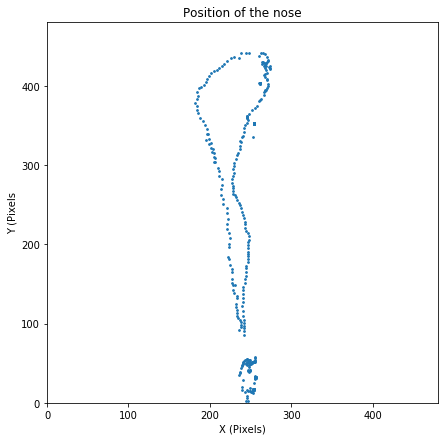

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(df["nose","x"],df["nose","y"],s=3)
plt.title("Position of the nose")
plt.xlabel("X (Pixels)")
plt.ylabel("Y (Pixels")
plt.xlim(0,480)
plt.ylim(0,480)
plt.show()

When the network is uncertain about a body part, the likelihood goes down.

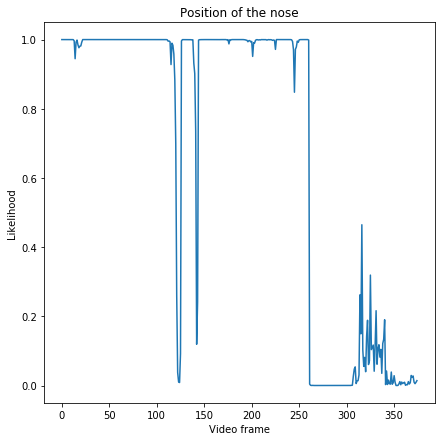

In [120]:
plt.figure(figsize=(7,7))
plt.plot(df["nose","likelihood"])
plt.title("Position of the nose")
plt.xlabel("Video frame")
plt.ylabel("Likelihood")
plt.show()


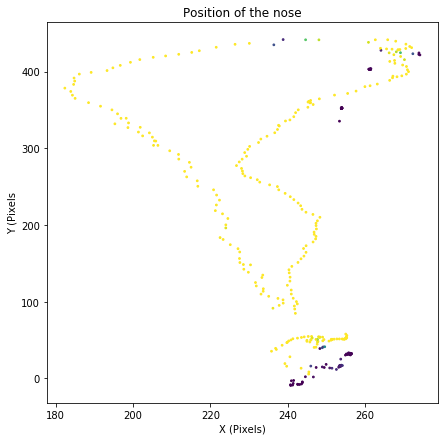

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(df["nose","x"],df["nose","y"],s=3,c=df["nose","likelihood"].to_numpy())
plt.title("Position of the nose")
plt.xlabel("X (Pixels)")
plt.ylabel("Y (Pixels")
plt.show()

The network is uncertain near the bridge and near the lever.

## Loading frames from a video

If you want to load video frames in python, I would recommend using OpenCV

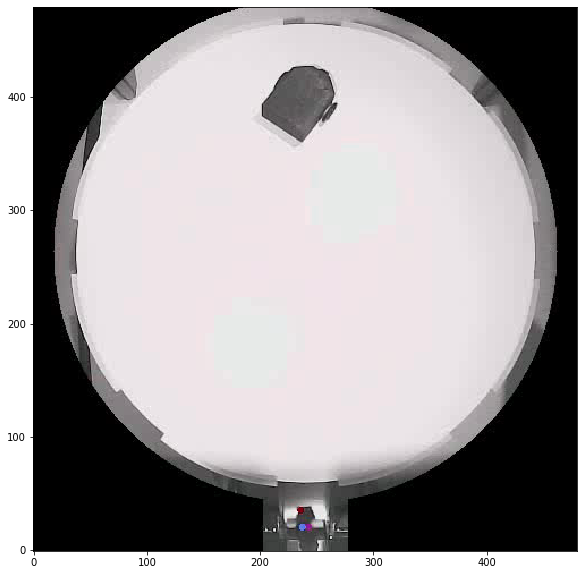

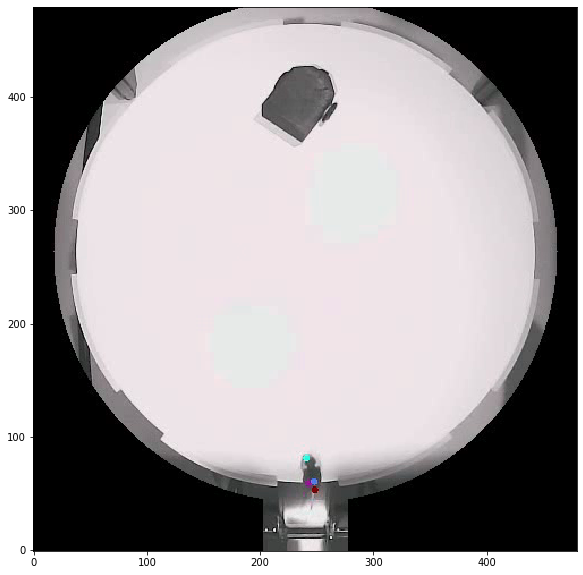

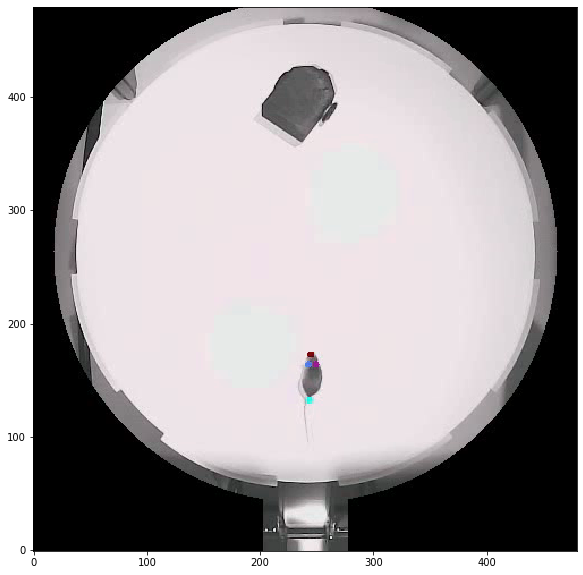

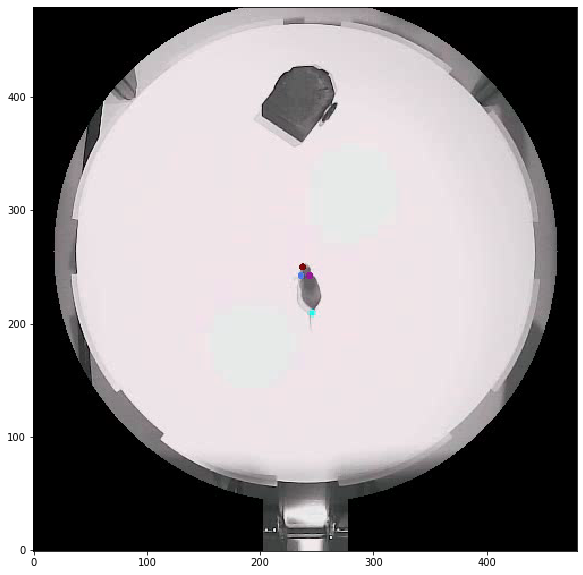

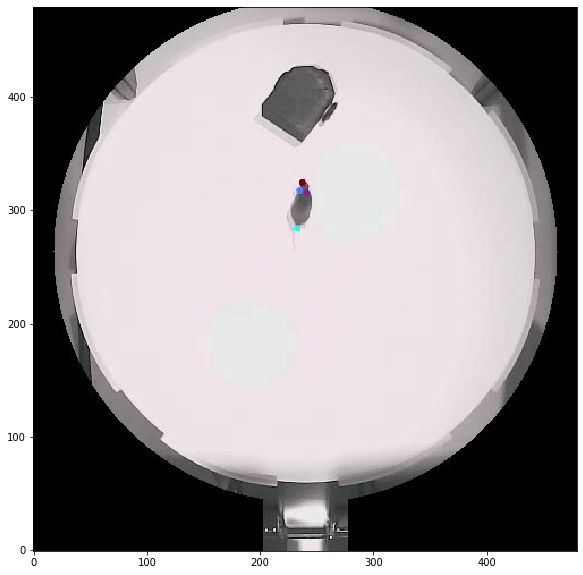

In [122]:
import cv2
fn="labeled_videos/mn4673-01102019-1951_trial_57DLC_resnet50_OpenFieldDez1shuffle1_75000_labeled.mp4"
cap= cv2.VideoCapture(fn)
i=0
while(cap.isOpened() and  i < 100):
    ret, frame = cap.read()
    if ret == False:
        break
    if i % 20 == 0:
        plt.figure(figsize=(10,10))
        plt.imshow(frame,origin="lower")
        plt.show()
    i+=1
 
cap.release()

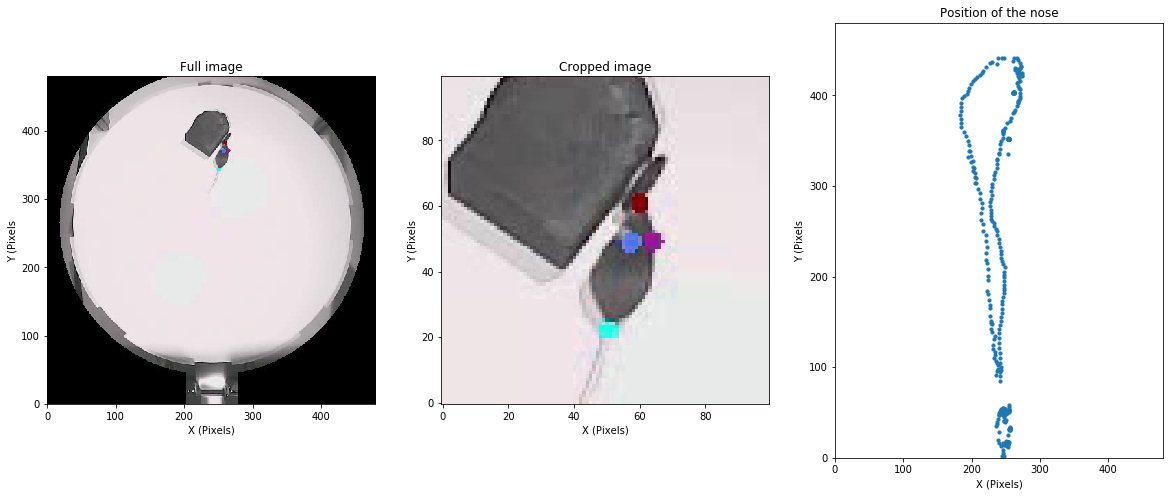

In [123]:
fig,ax = plt.subplots(1,3,figsize=(20,8))


ax[0].imshow(frame,origin="lower")
ax[0].set_xlabel("X (Pixels)")
ax[0].set_ylabel("Y (Pixels")
ax[0].set_title("Full image")

size=100
ax[1].imshow(frame[320:320+size,200:200+size],origin="lower")
ax[1].set_xlabel("X (Pixels)")
ax[1].set_ylabel("Y (Pixels")
ax[1].set_title("Cropped image")


ax[2].scatter(df["nose","x"],df["nose","y"],s=10)
ax[2].set_title("Position of the nose")
ax[2].set_xlabel("X (Pixels)")
ax[2].set_ylabel("Y (Pixels")
ax[2].set_xlim(0,480)
ax[2].set_ylim(0,480)

plt.savefig("../images/dlc_path.png")
plt.show()

## Additional considerations when using DeepLabCut in experiments

1. You will probably need to save the time at which every video frame is acquired in order to correlate with brain activity, important task events, etc.
2. Frequently look at the tracking quality by inspecting labelled videos. If your setup changes, the neural network might not be as good as you expect.
3. You can look for jumps in the position of the animal as potential error.
